# Flight Cancellation Predictors
## by Kevin Wu Almanzar

## Investigation Overview

In this investigation, I wanted to look different features and see how well they could be used to predict flight cancellations.

## Dataset Overview

The dataset used contained flight attributes for almost 2,389,217 flights that occurred in 2008. To reduce runtime and to narrow this exploration, only the month of January was analyzed, which has 605,765 entries. Once we look at only cancelled flights, the attributes are reduced to 8 variables (including the cancellation variable) as a lot of data is not collected once a flight is cancelled (e.g. Actual Arrival Time).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe

df=pd.read_csv('2008.csv')
df=df[df.Month == 1]

df2=df[df.Cancelled==1]

## Distribution of Cancelled and Non-Cancelled Flights

There are approximately 600,000 entries. Of the 600,00 entries only a small fraction make up cancelled flights.

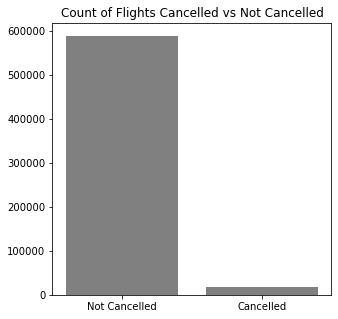

In [4]:
#Plotting cancelled vs non-cancelled flights as .countplot

plt.figure(figsize=[5,5])
sb.countplot(x=df.Cancelled, color='grey');
plt.ylabel(None);
plt.xlabel(None)
plt.title('Count of Flights Cancelled vs Not Cancelled');
plt.xticks(ticks=[0,1],labels=['Not Cancelled', 'Cancelled']);

## Cancelled Flight Rate by Carrier

Cancelled flights are higher for some airline carriers. While rates are only single digit, they may add up with other factors.

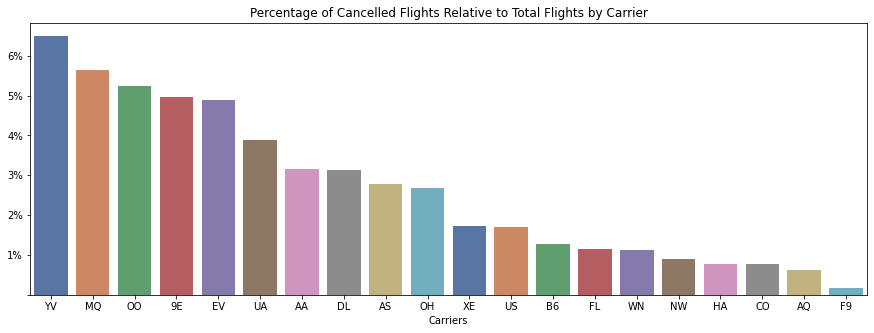

In [7]:
#Feature engineering new cancellation proportion table for Carrier.

df3=pd.DataFrame(df2.groupby('UniqueCarrier').Cancelled.count())
df3['all_flights']=pd.DataFrame(df.groupby('UniqueCarrier').Cancelled.count())
df3['cancelled_prop']=df3['Cancelled']*100/df3['all_flights']
df3=df3.sort_values('cancelled_prop', ascending=False)
df3=df3.reset_index()

#Barplot cancellation %s per Unique Carrier.
plt.figure(figsize=[15,5])
sb.barplot(data=df3, x='UniqueCarrier', y='cancelled_prop', palette='deep');
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Carrier');
plt.ylabel(None)
plt.xlabel('Carriers')
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['','1%','2%','3%','4%','5%','6%']);

## Cancelled Flight Rates by Specific Planes

Specific planes (identified by their Tail Number) can be a good indicator of whether a flight will be cancelled. Some planes have cancellation rates up to ~26%.

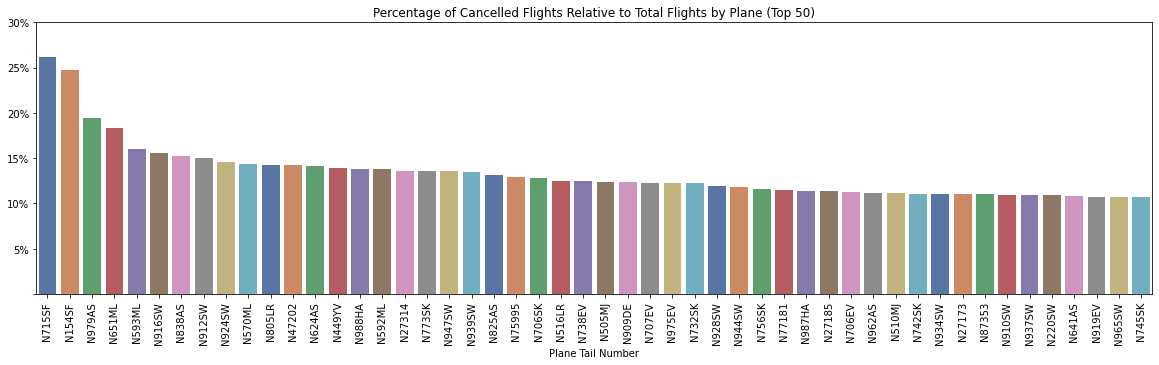

In [10]:
#Feature engineering new cancellation proportion table for planes according to tail numbers.

df7=pd.DataFrame(df2.groupby('TailNum').Cancelled.count())
df7['all_flights']=pd.DataFrame(df.groupby('TailNum').Cancelled.count())
df7['cancelled_prop']=df7['Cancelled']*100/df7['all_flights']
df7=df7.sort_values('cancelled_prop', ascending=False)
df7=df7.reset_index()
df7=df7[df7.all_flights>30]

#Barplot for cancellation proportions by plane tail number. Only planes with atleast 30 flights were listed and 
#only planes with the top 50 cancellation proportions were listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df7.head(50), x='TailNum', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Plane (Top 50)');
plt.ylabel(None);
plt.xlabel('Plane Tail Number');
plt.yticks(ticks=[0, 5, 10, 15, 20, 25, 30], labels=['','5%','10%','15%','20%', '25%', '30%']);

## Combination Effects between Carriers and Specific Planes

When planes with the most cancellations are identified and classified by carriers, a pattern is shown where these planes are owned by a few carriers. These carriers are also in the top 10 carriers for cancellation rates.

These two factors are likely related and likely strengthen each other due to overlap. The streghtening factor was not explored.

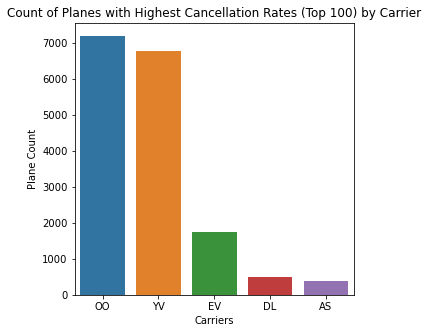

In [11]:
#List of Top 100 Planes with Highest Cancellation Rates from Bivariate Exploration #4
list1=list(df7.iloc[0:100].TailNum.values)

#Creating DF for plotting.
df12=df.copy()
df12=df12[df12.TailNum.isin(list1)]
df12=pd.DataFrame(df12.groupby('UniqueCarrier').TailNum.size())
df12=df12.reset_index()

plt.figure(figsize=[5,5])
sb.barplot(data=df12, x='UniqueCarrier', y='TailNum', order=['OO','YV','EV','DL','AS']);
plt.ylabel('Plane Count');
plt.xlabel('Carriers')
plt.title('Count of Planes with Highest Cancellation Rates (Top 100) by Carrier');

## Cancelled Flight Rates by Origin

Certain destinations have cancellation rates up to 31%, which can be used to predict whether a flight will be cancelled.

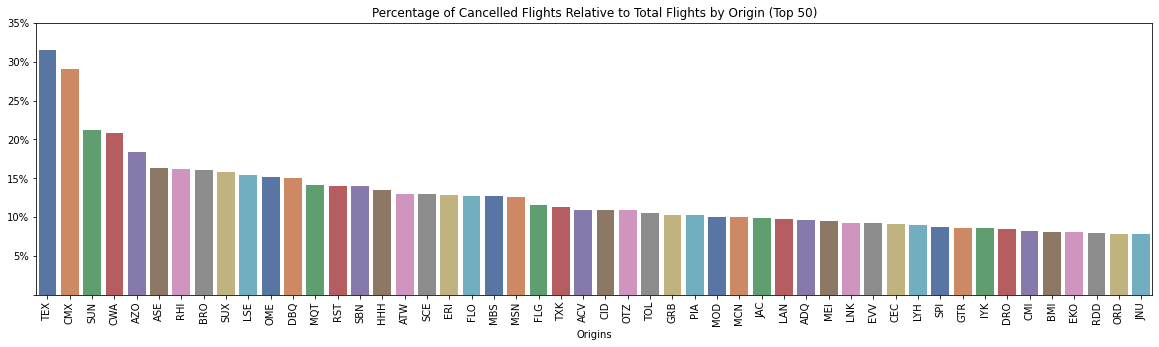

In [14]:
#Feature engineering new cancellation proportion table for Origin.

df5=pd.DataFrame(df2.groupby('Origin').Cancelled.count())
df5['all_flights']=pd.DataFrame(df.groupby('Origin').Cancelled.count())
df5['cancelled_prop']=df5['Cancelled']*100/df5['all_flights']
df6=df5.sort_values('cancelled_prop', ascending=False)
df6=df6.reset_index()
df6=df6[df6.all_flights>30]

#Barplot cancellation %s per Origin - Only the 50 most cancelled (by %) origins shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df6.head(50), x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Origin (Top 50)');
plt.ylabel(None);
plt.xlabel('Origins');
plt.yticks(ticks=[0, 5, 10, 15, 20, 25, 30, 35], labels=['','5%','10%','15%','20%', '25%', '30%', '35%']);

## Cancelled Flight Rates by Destination

Certain destinations have cancellation rates up to 26%, which can be used to predict whether a flight will be cancelled.

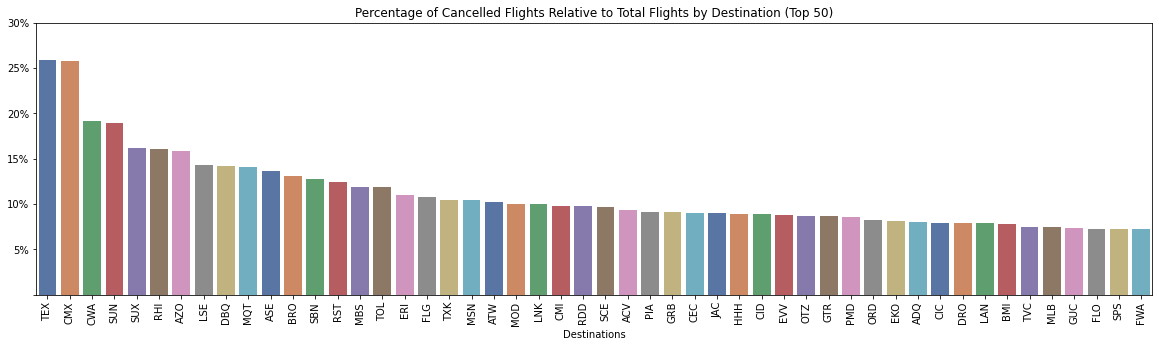

In [15]:
#Feature engineering new cancellation proportion table for Destination.

df4=pd.DataFrame(df2.groupby('Dest').Cancelled.count())
df4['all_flights']=pd.DataFrame(df.groupby('Dest').Cancelled.count())
df4['cancelled_prop']=df4['Cancelled']*100/df4['all_flights']
df4=df4.sort_values('cancelled_prop', ascending=False)
df4=df4.reset_index()
df4=df4[df4.all_flights>30]

#Barplot cancellation %s per Destination.- Only the 50 most cancelled (by %) destinations shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df4.head(50), x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Destination (Top 50)');
plt.ylabel(None);
plt.xlabel('Destinations');
plt.yticks(ticks=[0,5,10,15,20,25,30], labels=['','5%','10%','15%','20%','25%','30%']);

## Cancelled Flight Rate Combining Origin and Destination

While specific airports may be used to try to predict cancellations, specific routes may be a better indicator with cancellation rates reaching up to ~30% for specific routes. These specific routes will strengthen or weaken the cancellation rates for individual origins or destinations.

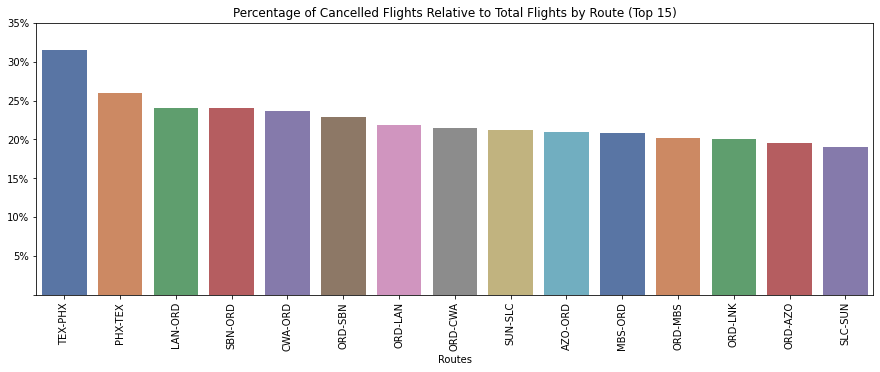

In [16]:
#Creating dataframe to feature engineer cancelled proportions for specific routes.

df11=df.copy()
df11['route']= df11.Origin +'-'+ df11.Dest
df11=df11.groupby(['route','Origin','Dest','Cancelled']).size().unstack()
df11=df11.reset_index()
df11.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df11.Cancelled.replace(np.nan,0, inplace=True)
df11['total_flights']=df11['Not_Cancelled']+df11['Cancelled']
df11['cancelled_proportion']=df11.Cancelled*100/df11.total_flights
df11.drop(columns=['Cancelled','Not_Cancelled'], inplace=True)

#Only routes with more than 50 total flights included in analysis.
df11=df11[df11.total_flights>50]

#Ordering df11 for plotting.
df11=df11.sort_values('cancelled_proportion', ascending=False)

#Plotting Top 15

plt.figure(figsize=(15,5))
sb.barplot(data=df11.head(15), x='route', y='cancelled_proportion', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.xlabel('Routes');
plt.ylabel(None);
plt.yticks([0,5,10,15,20,25,30,35],['','5%','10%','15%','20%','25%','30%', '35%']);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Route (Top 15)');

## Main Takeaways:

#### - The best indicators for cancellations appear to be specific routes and planes with double digit cancellation rates.
#### - Carriers can also be an indicator of flight cancellations, but it is a weaker indicator with single digit cancellation rates.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!